# Innemiljømonitor data analyse

In [15]:
import pandas as pd
from datetime import date
df = pd.read_excel('thingspeak_20250327.xlsx')
df['created_at'] = pd.to_datetime(df['created_at']) # Konverterer til en Python DateTime
# Tar bort ekstremverdiene for TVOS
df = df[(df["TVOC"] >= 10) & (df["TVOC"] <= 2000)]
# Hopper over tidlige data
df = df[df["created_at"] >= '2025-03-24'] 
df.head()



,created_at,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280)
368,2025-03-24 00:13:42+01:00,369,260,31.60200,101500.1,24.02897,24.37464
369,2025-03-24 00:51:06+01:00,370,254,31.35357,101491.7,24.02935,24.34735
370,2025-03-24 00:52:23+01:00,371,254,31.30455,101492.3,24.01485,24.36195
371,2025-03-24 00:53:24+01:00,372,253,31.28185,101494.6,23.99426,24.36829
372,2025-03-24 00:54:25+01:00,373,253,31.27556,101497.3,24.00608,24.36576


In [2]:
df.describe()

,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280)
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,759.500000,376.204216,31.311242,100902.874506,23.896926,24.254034
std,438.353168,2601.991180,1.720616,552.048368,0.449536,0.454601
min,1.000000,122.000000,22.181610,100150.800000,20.333860,20.604310
25%,380.250000,187.000000,30.436353,100320.375000,23.683740,24.042585
50%,759.500000,256.000000,31.432105,100805.150000,23.884580,24.223290
75%,1138.750000,336.000000,32.137370,101490.475000,24.121090,24.482520
max,1518.000000,99999.000000,49.205590,102436.300000,26.582720,26.933130


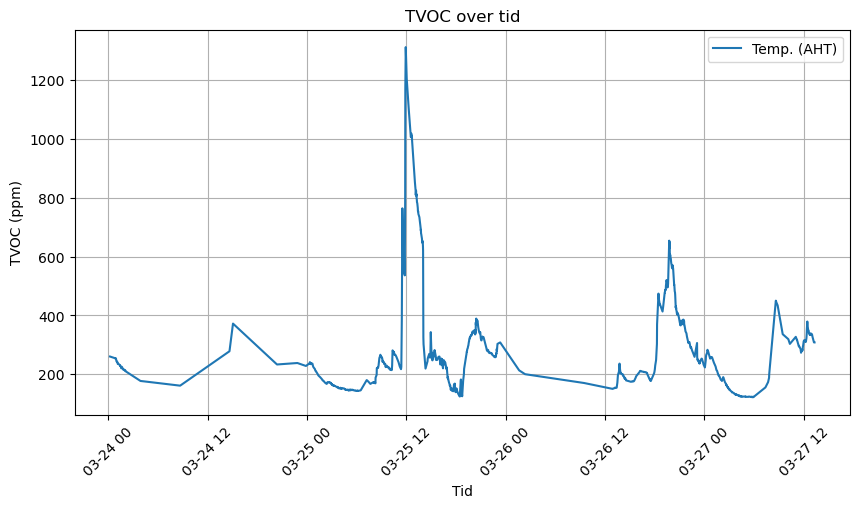

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df["created_at"], df["TVOC"], marker="", linestyle="-", label="Temp. (AHT)")

plt.xlabel("Tid")
plt.ylabel("TVOC (ppm)")
plt.title("TVOC over tid")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Vise grafen
plt.show()


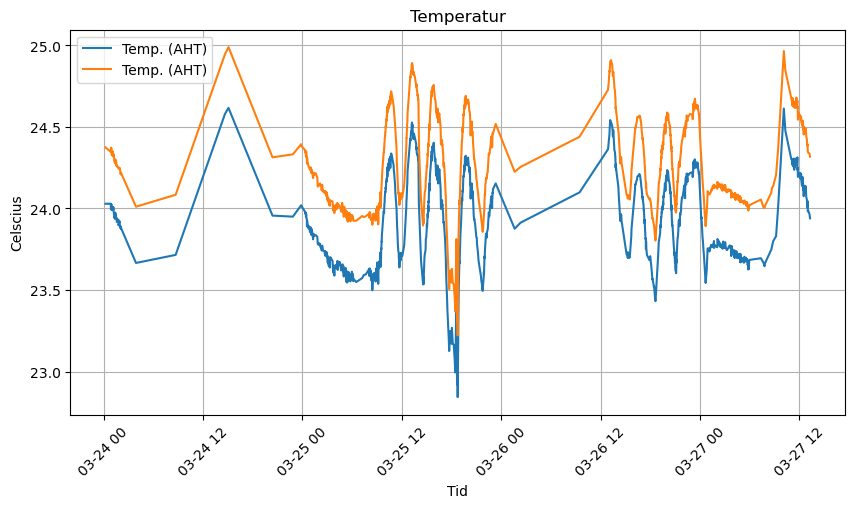

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df["created_at"], df["Temperature (AHT20)"], marker="", linestyle="-", label="Temp. (AHT)")
plt.plot(df["created_at"], df["Temperature (BMP280)"], marker="", linestyle="-", label="Temp. (AHT)")
plt.xlabel("Tid")
plt.ylabel("Celscius")
plt.title("Temperatur")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Vise grafen
plt.show()
